In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df_tweets_ratio = pd.read_csv('combine_methods_ratio_all.csv')
df_tweets_ratio.loc[df_tweets_ratio['party'] == 'AFD', 'party'] = 'AfD'
parties = df_tweets_ratio['party'].unique()

party_colors = {
    'SPD': 'red',
    'CDU': 'black',
    'AfD': 'blue',
    'FDP': 'yellow',
    'Bündnis 90/Die Grünen': 'green',
    'Die Linke': 'purple',
    'CSU': 'lightblue',
    'Fraktionslos': 'grey'
}


# Number of Covid Tweets per Party

Number of Covid Tweets per Party
Number of Total Tweets/ Covid Tweets per Party
Diagramm fehlt


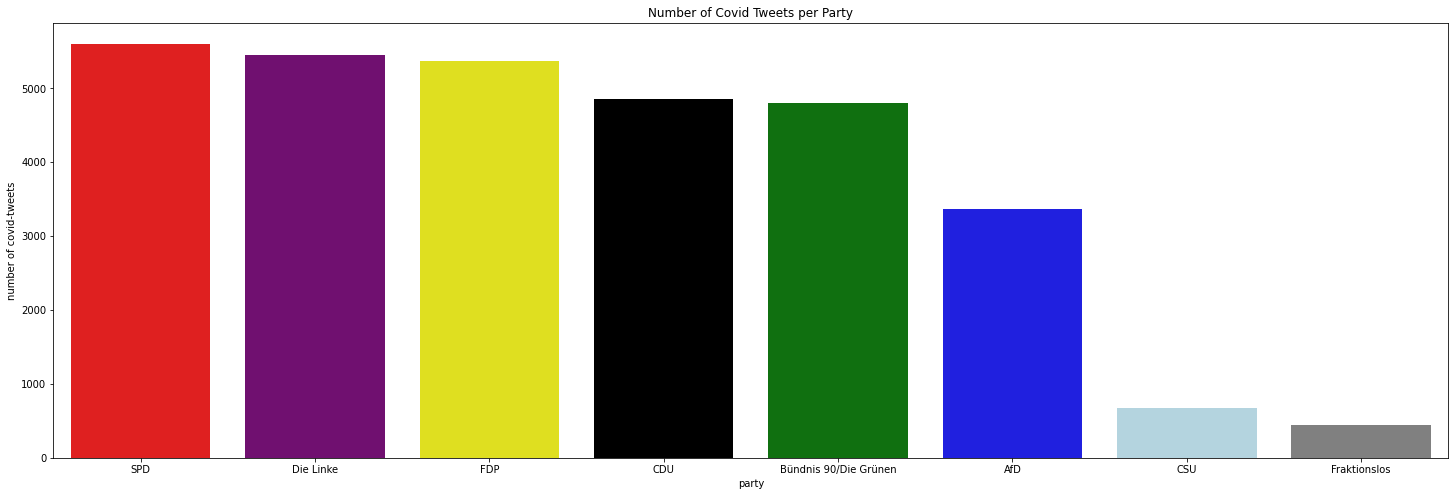

In [5]:
print("Number of Covid Tweets per Party")
df_covid_tweets_per_party = df_tweets_ratio[['party','covid_tweets']].groupby(['party']).sum()
df_covid_tweets_per_party.reset_index(inplace=True)
df_covid_tweets_per_party = df_covid_tweets_per_party.rename(columns={'covid_tweets':'covid_tweets_per_party'})
fig = plt.subplots(figsize=(25,8))
chart = sns.barplot(data=df_covid_tweets_per_party, x='party', y='covid_tweets_per_party',order=df_covid_tweets_per_party.sort_values('covid_tweets_per_party', ascending=False).party, palette=party_colors)
chart.set(ylabel='number of covid-tweets', title='Number of Covid Tweets per Party')
plt.show()

print("Number of Total Tweets/ Covid Tweets per Party")
print("Diagramm fehlt")


# Number of Top Tweets per Party

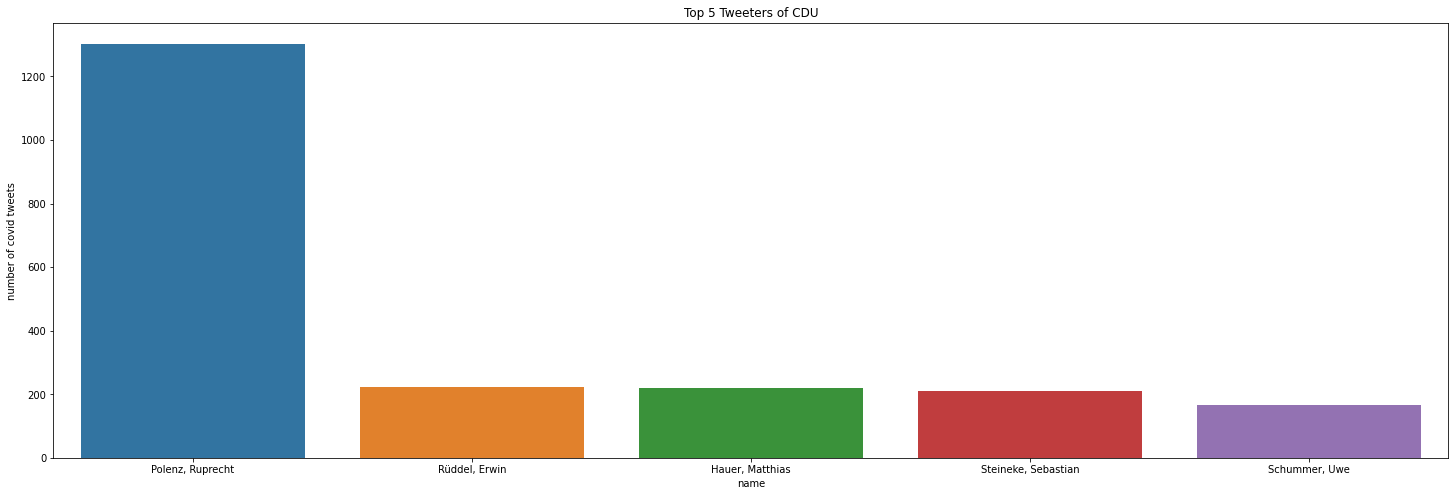

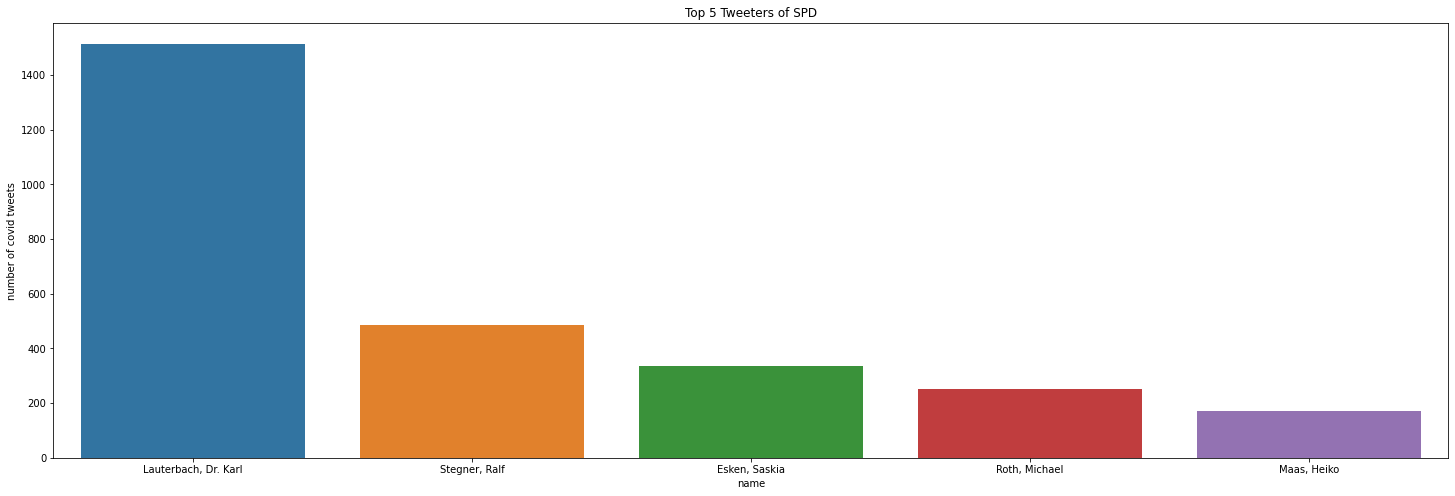

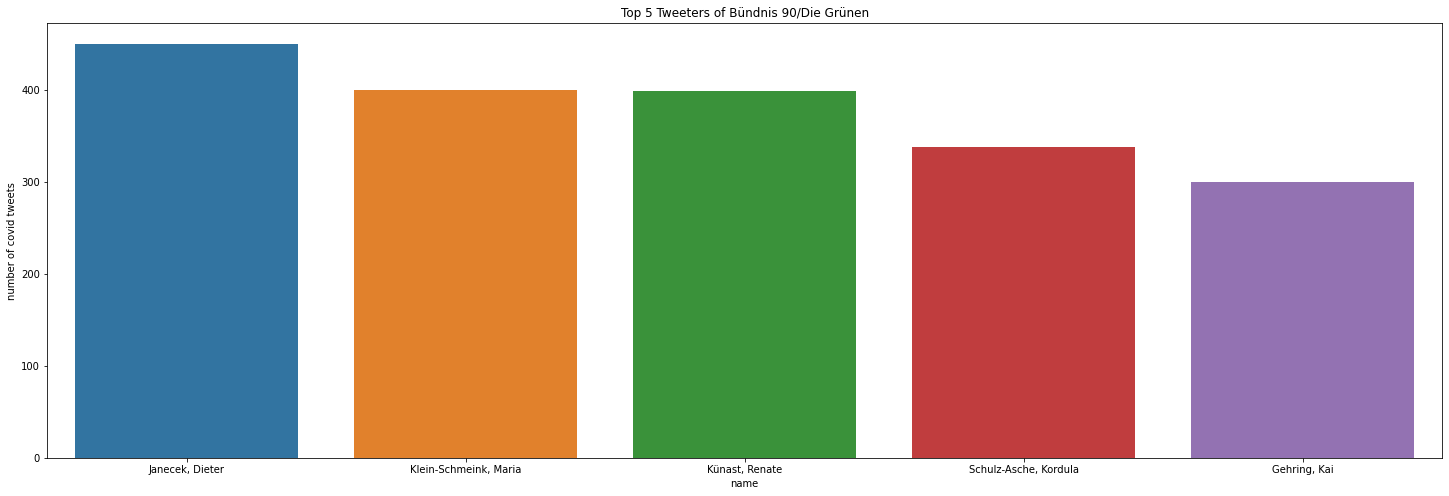

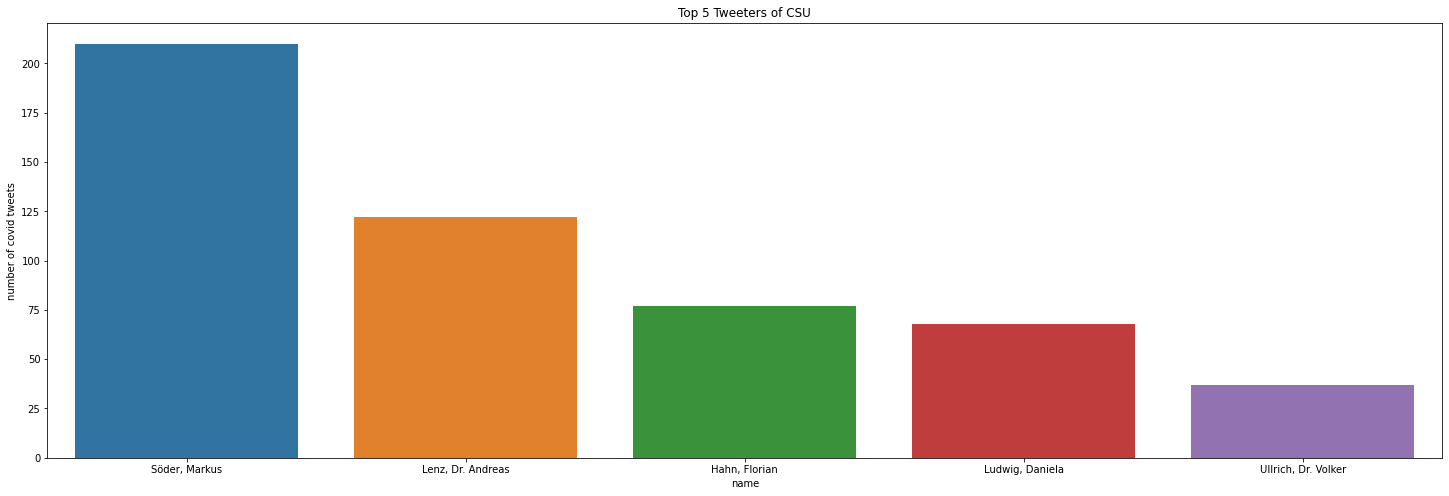

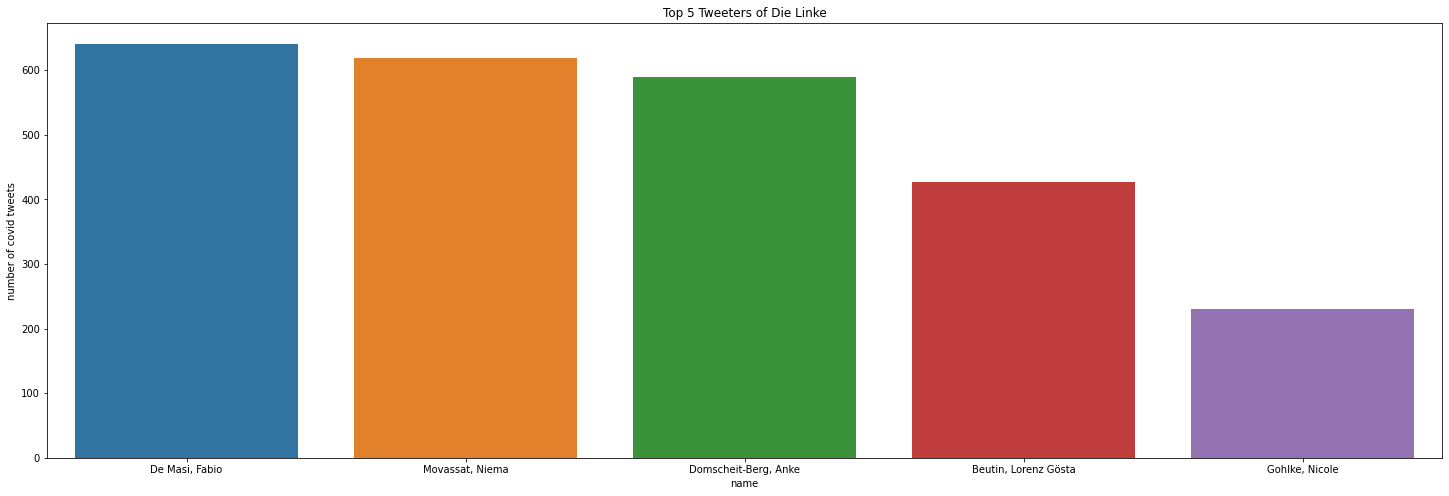

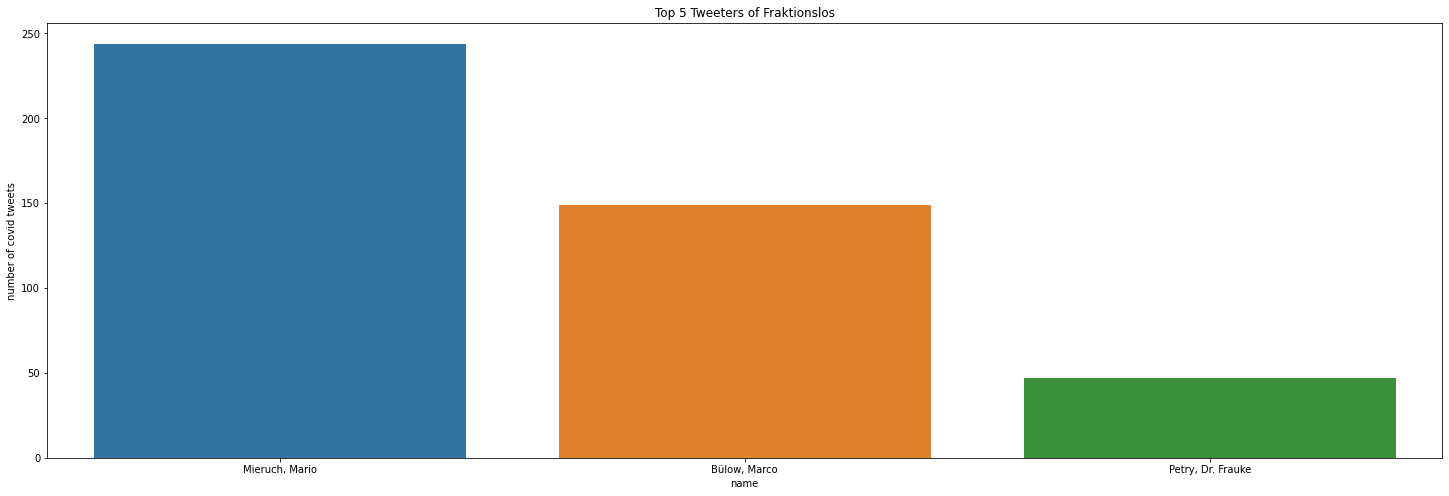

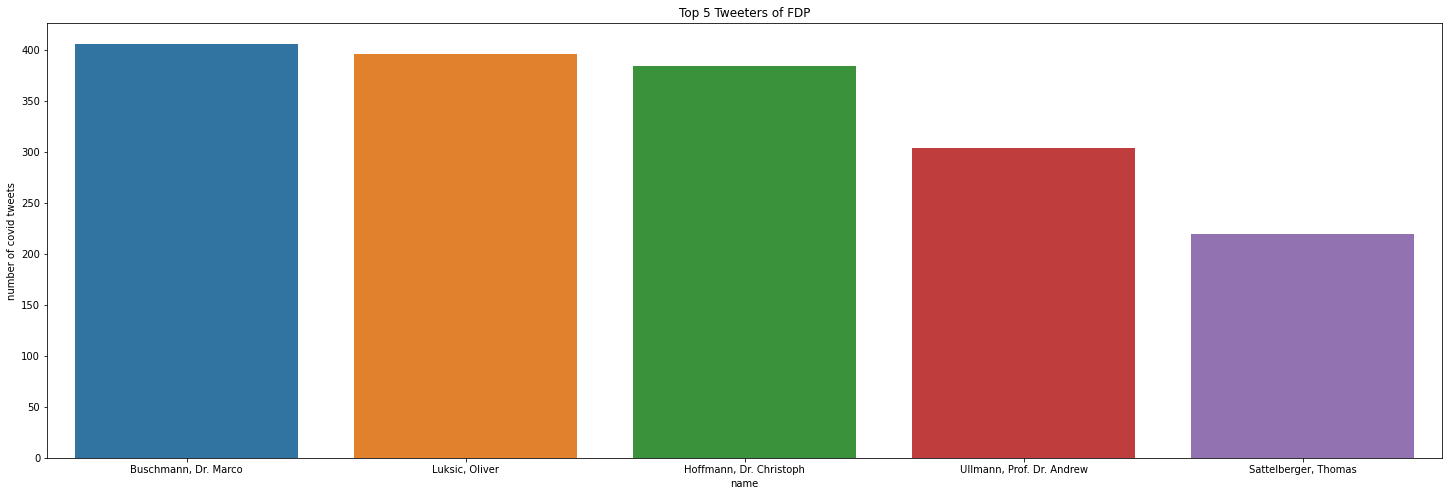

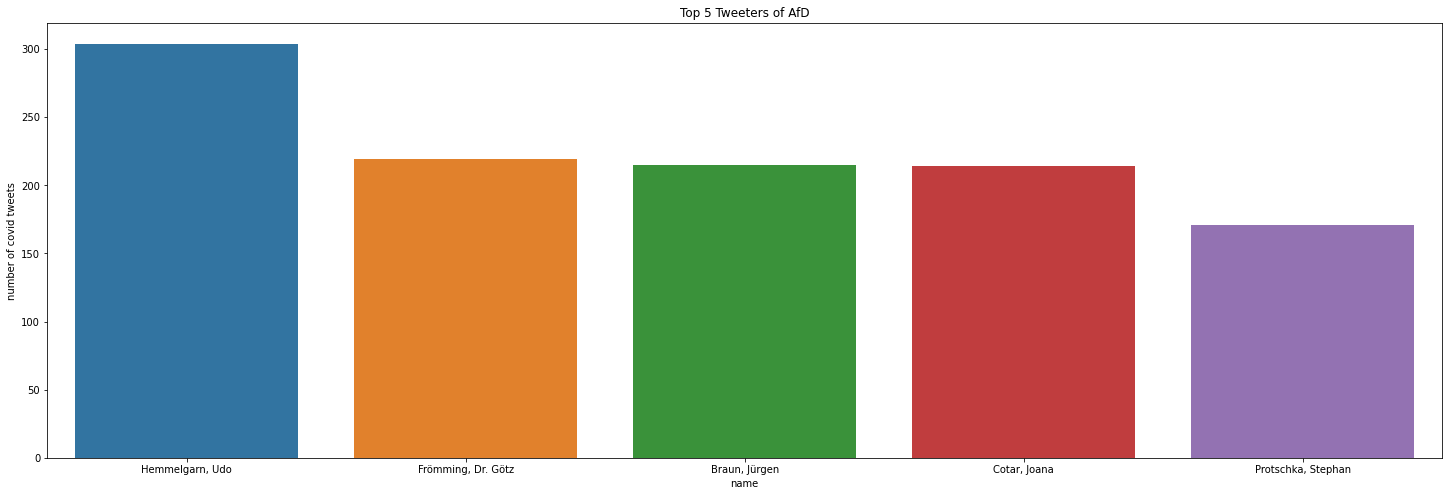

In [6]:
number_of_top_tweeters = 5
for p in parties:
    politicians_per_party = df_tweets_ratio[df_tweets_ratio['party'] == p].sort_values(by='covid_tweets', ascending=False).head(number_of_top_tweeters)
    fig = plt.figure(figsize=(25, 8))
    chart = sns.barplot(data=politicians_per_party,
                        x='name',
                        y='covid_tweets')
    chart.set(ylabel='number of covid tweets',
              title=f'Top {number_of_top_tweeters} Tweeters of {p}')
    plt.show()
